In [ ]:
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

from functions import (drop_duplicates,
                       concat_dataframes,
                       remove_all_punctuation,
                       drop_irrelevant_columns,
                       standardize_column_names,
                       filter_by_regex_pattern,
                       standardize_dates
                       )

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")
config
if config is not None:
    job_nyc1 = pd.read_csv(config['input_data']['file1'])
    job_nyc2 = pd.read_csv(config['input_data']['file2'])
else:
    print("Cannot load data files because config is missing.")


In [ ]:
display(job_nyc1)


In [ ]:
job_nyc1["Preferred Skills"].isnull().sum()

In [ ]:
job_nyc2["Preferred Skills"].isnull().sum()

In [ ]:
# job_nyc["Preferred Skills"].value_counts(dropna=False)

In [ ]:
display(pd.DataFrame({
    "non_nulls": job_nyc1.count(),
    "nulls": job_nyc1.isnull().sum(),
    "total": len(job_nyc1)
}))

In [ ]:
display(pd.DataFrame({
    "non_nulls": job_nyc2.count(),
    "nulls": job_nyc2.isnull().sum(),
    "total": len(job_nyc2)
}))

In [2]:
df_merged = concat_dataframes(job_nyc1,job_nyc2)

In [3]:
# Standardize column names
df_merged = standardize_column_names(df_merged) 

In [4]:
display(df_merged.columns)

Index(['job_id', 'agency', 'posting_type', '#_of_positions', 'business_title',
       'civil_service_title', 'title_classification', 'title_code_no', 'level',
       'job_category', 'full-time/part-time_indicator', 'career_level',
       'salary_range_from', 'salary_range_to', 'salary_frequency',
       'work_location', 'division/work_unit', 'job_description',
       'minimum_qual_requirements', 'preferred_skills',
       'additional_information', 'to_apply', 'hours/shift', 'work_location_1',
       'recruitment_contact', 'residency_requirement', 'posting_date',
       'post_until', 'posting_updated', 'process_date'],
      dtype='object')

In [5]:
df_merged = drop_duplicates(df_merged,'job_id')

In [6]:
columns = ['job_id', 'posting_type', 'civil_service_title', 'title_classification', 
'title_code_no', 'full-time/part-time_indicator', 'work_location', 'division/work_unit',
'job_description', 'minimum_qual_requirements', 'additional_information', 'to_apply', 
'hours/shift', 'work_location_1', 'recruitment_contact', 'residency_requirement', 'posting_updated',
'process_date']

df_merged = drop_irrelevant_columns(df_merged, columns)

In [7]:
display(df_merged.columns)

Index(['agency', '#_of_positions', 'business_title', 'level', 'job_category',
       'career_level', 'salary_range_from', 'salary_range_to',
       'salary_frequency', 'preferred_skills', 'posting_date', 'post_until'],
      dtype='object')

In [ ]:
display(pd.DataFrame({
    "non_nulls": df_merged.count(),
    "nulls": df_merged.isnull().sum(),
    "total": len(df_merged)
}))

In [8]:
cat_cols = list(df_merged.select_dtypes(include=['object']))
cat_cols

['agency',
 'business_title',
 'level',
 'job_category',
 'career_level',
 'salary_frequency',
 'preferred_skills',
 'posting_date',
 'post_until']

In [9]:
# Clean up categorical columns (type = 'object') except dates
cat_cols = ['agency',
 'business_title',
 'level',
 'job_category',
 'career_level',
 'salary_frequency',
 'preferred_skills']
 
df_merged = remove_all_punctuation(df_merged,cat_cols)

In [12]:
df_merged[['preferred_skills','job_category','level']]

,preferred_skills,job_category,level
0,must have a valid pe license,engineering architecture planning,00
1,student must currently be enrolled at a colleg...,engineering architecture planning,00
2,NaN,communications intergovernmental affairs techn...,00
3,a baccalaureate degree from an accredited coll...,engineering architecture planning,00
4,preference will be given to candidates with at...,engineering architecture planning,m2
...,...,...,...
10906,NaN,administration human resources,01
10957,NaN,engineering architecture planning public safet...,03
10961,NaN,communications intergovernmental affairs,my
11037,NaN,communications intergovernmental affairs,my


In [13]:
df_merged['level'].nunique()

20

In [14]:
df_merged_dates = df_merged.copy()

In [15]:
df_merged_dates[['posting_date', 'post_until']]

,posting_date,post_until
0,06/08/2022,NaN
1,04/02/2024,11-JUN-2024
2,02/27/2024,26-FEB-2025
3,03/05/2024,29-MAY-2024
4,11/06/2023,NaN
...,...,...
10906,10/18/2024,NaN
10957,04/25/2025,NaN
10961,05/29/2025,NaN
11037,05/12/2025,NaN


In [ ]:
date_cols = ['posting_date', 'post_until']
df_merged_dates = standardize_dates(df_merged,date_cols)

d:\vscode101\first_project\notebooks\functions.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)


In [17]:
df_merged_dates[['posting_date', 'post_until']]

,posting_date,post_until
0,2022-08-06,NaT
1,2024-02-04,2024-06-11
2,NaT,2025-02-26
3,2024-05-03,2024-05-29
4,2023-06-11,NaT
...,...,...
10906,NaT,NaT
10957,NaT,NaT
10961,NaT,NaT
11037,2025-12-05,NaT


In [21]:
df_merged = df_merged_dates.copy().reset_index(drop=True)

In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   agency             5271 non-null   object        
 1   #_of_positions     5271 non-null   int64         
 2   business_title     5271 non-null   object        
 3   level              5271 non-null   object        
 4   job_category       5271 non-null   object        
 5   career_level       5271 non-null   object        
 6   salary_range_from  5271 non-null   float64       
 7   salary_range_to    5271 non-null   float64       
 8   salary_frequency   5271 non-null   object        
 9   preferred_skills   3338 non-null   object        
 10  posting_date       2045 non-null   datetime64[ns]
 11  post_until         2001 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 494.3+ KB


In [23]:
display(df_merged['business_title'])

0                                       region supervisor
1       2024bws010early warning remote modeling intern...
2                                    intelligence analyst
3                     senior coordinator capital projects
4                                                director
                              ...                        
5266                        deputy director of onboarding
5267                             environmental specialist
5268                       deputy communications director
5269                  director for digital communications
5270     greenways project lead office of livable streets
Name: business_title, Length: 5271, dtype: object

In [65]:
regex_pattern = r"\b(data analyst|data engineer|data analyst)\w*\b"
df_data_analyst = filter_by_regex_pattern(df_merged,'business_title', regex_pattern)

d:\vscode101\first_project\notebooks\functions.py:44: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df[column].str.contains(regex_pattern, flags=re.IGNORECASE, na=False, regex=True)


In [66]:
df_data_analyst.info()
df_merged['level'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   agency             43 non-null     object        
 1   #_of_positions     43 non-null     int64         
 2   business_title     43 non-null     object        
 3   level              43 non-null     object        
 4   job_category       43 non-null     object        
 5   career_level       43 non-null     object        
 6   salary_range_from  43 non-null     float64       
 7   salary_range_to    43 non-null     float64       
 8   salary_frequency   43 non-null     object        
 9   preferred_skills   20 non-null     object        
 10  posting_date       20 non-null     datetime64[ns]
 11  post_until         36 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 4.2+ KB


20

In [67]:
regex_pattern = r"(sql|tableau|bi|phyton|eda|llm|ai|ml|pandas|numpy|agile)"
df_keywords = filter_by_regex_pattern(df_merged,'preferred_skills', regex_pattern)

df_keywords

d:\vscode101\first_project\notebooks\functions.py:44: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df[column].str.contains(regex_pattern, flags=re.IGNORECASE, na=False, regex=True)


,agency,#_of_positions,business_title,level,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,preferred_skills,posting_date,post_until
0,dept of environment protection,1,2024bws010early warning remote modeling intern...,00,engineering architecture planning,student,16.0,16.0,hourly,student must currently be enrolled at a colleg...,2024-02-04,2024-06-11
1,office of criminal justice,1,senior coordinator capital projects,00,engineering architecture planning,experienced nonmanager,59116.0,80000.0,annual,a baccalaureate degree from an accredited coll...,2024-05-03,2024-05-29
2,dept of design construction,1,director,m2,engineering architecture planning,manager,64922.0,144066.0,annual,preference will be given to candidates with at...,2023-06-11,NaT
3,department of transportation,3,community coordinator,00,constituent services community programs,experienced nonmanager,59116.0,91768.0,annual,excellent communication oral and written prese...,NaT,NaT
4,dept of design construction,2,senior contract manager,00,finance accounting procurement,experienced nonmanager,70611.0,81203.0,annual,candidates should have excellent organizationa...,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2643,consumer and worker protection,1,inspector 719349,01,public safety inspections enforcement,experienced nonmanager,49396.0,56805.0,annual,strong written and oral communication skills p...,NaT,2025-10-11
2644,bronx district attorney,2,programmer,00,technology data innovation,experienced nonmanager,85078.0,85078.0,annual,qualifications experience or familiarity with ...,NaT,NaT
2645,dept of environment protection,1,dir of executive administrationbureau administ...,m4,administration human resources,manager,94050.0,242675.0,annual,experience managing a shared service team prov...,NaT,NaT
2646,dept of design construction,1,surveyor,1b,engineering architecture planning,experienced nonmanager,70248.0,80785.0,annual,candidate should possess a minimum of three 3 ...,NaT,NaT


In [78]:
# df_merged.to_csv(config['output_data']['file1'], index=False, sep=";", encoding="utf-8")
df_keywords

,agency,#_of_positions,business_title,level,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,preferred_skills,posting_date,post_until,sector_group,posting_year,salary_avg,is_data_role,salary_midpoint,posting_month,is_tech
0,dept of environment protection,1,2024bws010early warning remote modeling intern...,00,engineering architecture planning,student,16.0,16.0,hourly,student must currently be enrolled at a colleg...,2024-02-04,2024-06-11,engineering architecture planning,2024.0,16.0,False,16.0,2024-02,True
1,office of criminal justice,1,senior coordinator capital projects,00,engineering architecture planning,experienced nonmanager,59116.0,80000.0,annual,a baccalaureate degree from an accredited coll...,2024-05-03,2024-05-29,engineering architecture planning,2024.0,69558.0,False,69558.0,2024-05,True
2,dept of design construction,1,director,m2,engineering architecture planning,manager,64922.0,144066.0,annual,preference will be given to candidates with at...,2023-06-11,NaT,engineering architecture planning,2023.0,104494.0,False,104494.0,2023-06,True
3,department of transportation,3,community coordinator,00,constituent services community programs,experienced nonmanager,59116.0,91768.0,annual,excellent communication oral and written prese...,NaT,NaT,Other,NaN,75442.0,False,75442.0,NaT,True
4,dept of design construction,2,senior contract manager,00,finance accounting procurement,experienced nonmanager,70611.0,81203.0,annual,candidates should have excellent organizationa...,NaT,NaT,finance accounting procurement,NaN,75907.0,False,75907.0,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,consumer and worker protection,1,inspector 719349,01,public safety inspections enforcement,experienced nonmanager,49396.0,56805.0,annual,strong written and oral communication skills p...,NaT,2025-10-11,Other,NaN,53100.5,False,53100.5,NaT,False
2644,bronx district attorney,2,programmer,00,technology data innovation,experienced nonmanager,85078.0,85078.0,annual,qualifications experience or familiarity with ...,NaT,NaT,technology data innovation,NaN,85078.0,False,85078.0,NaT,True
2645,dept of environment protection,1,dir of executive administrationbureau administ...,m4,administration human resources,manager,94050.0,242675.0,annual,experience managing a shared service team prov...,NaT,NaT,administration human resources,NaN,168362.5,False,168362.5,NaT,False
2646,dept of design construction,1,surveyor,1b,engineering architecture planning,experienced nonmanager,70248.0,80785.0,annual,candidate should possess a minimum of three 3 ...,NaT,NaT,engineering architecture planning,NaN,75516.5,False,75516.5,NaT,True


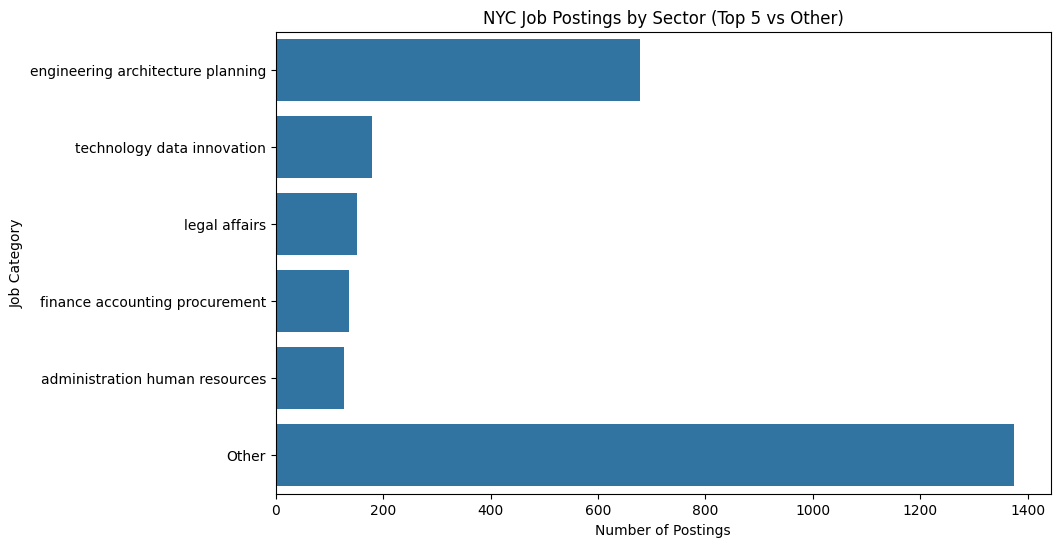

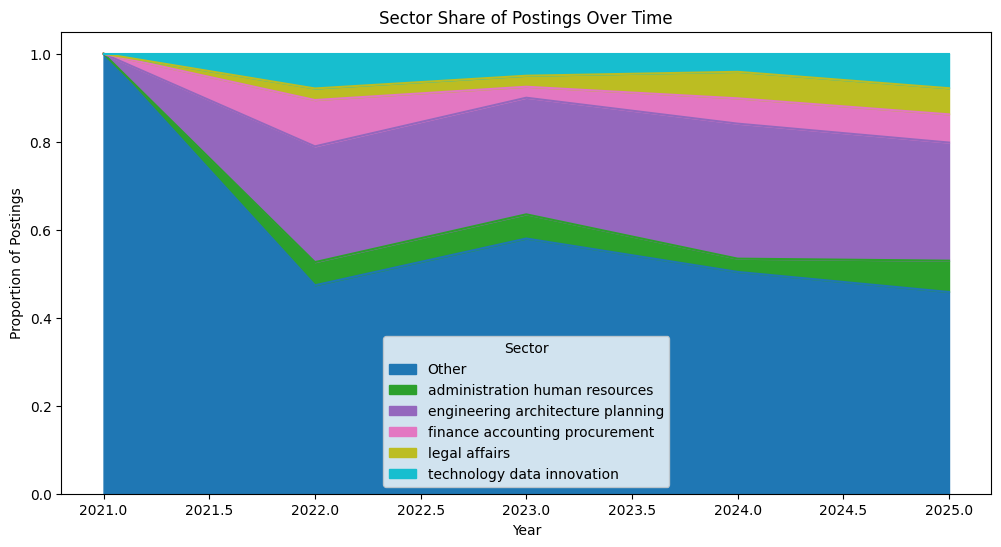

In [77]:
# Sector Distribution Hypothesis (General)
# Plot: Bar plot of top 5 job categories vs "Other" (rest), possibly as a percentage.
# Optionally: Stacked/time series to show stability over years.

# Top 5 Sectors Bar Plot
top_sectors = df_keywords['job_category'].value_counts().nlargest(5)
df_keywords['sector_group'] = df_keywords['job_category'].apply(lambda x: x if x in top_sectors.index else 'Other')

plt.figure(figsize=(10,6))
sns.countplot(data=df_keywords, y='sector_group', order=list(top_sectors.index)+['Other'])
plt.title('NYC Job Postings by Sector (Top 5 vs Other)')
plt.xlabel('Number of Postings')
plt.ylabel('Job Category')
plt.show()

# Stability Over Time (Stacked Area)
df_keywords['posting_year'] = df_keywords['posting_date'].dt.year
sector_year = df_keywords.groupby(['posting_year','sector_group']).size().unstack(fill_value=0)
sector_year_pct = sector_year.div(sector_year.sum(axis=1), axis=0)  # percentage

sector_year_pct.plot.area(figsize=(12,6), colormap='tab10')
plt.title('Sector Share of Postings Over Time')
plt.ylabel('Proportion of Postings')
plt.xlabel('Year')
plt.legend(title='Sector')
plt.show()

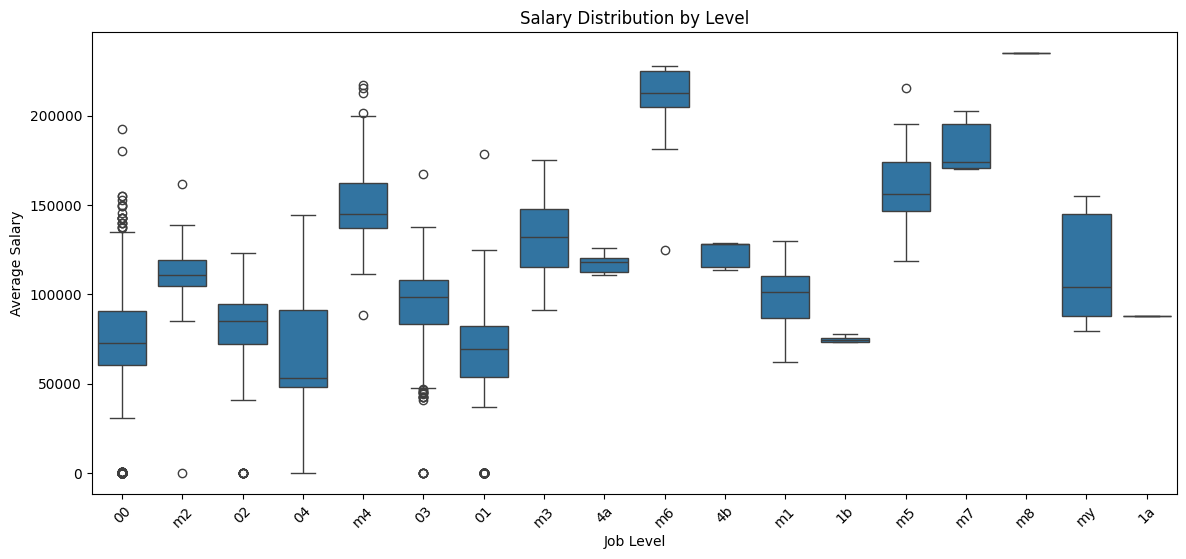

In [70]:
#  Salary Structure Hypothesis (General)
# Plot: Boxplot or violin plot of average salary by job level.

# Average salary column
df_keywords['salary_avg'] = df_keywords[['salary_range_from','salary_range_to']].mean(axis=1)
plt.figure(figsize=(14,6))
sns.boxplot(data=df_keywords, x='level', y='salary_avg')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Level')
plt.ylabel('Average Salary')
plt.xlabel('Job Level')
plt.show()

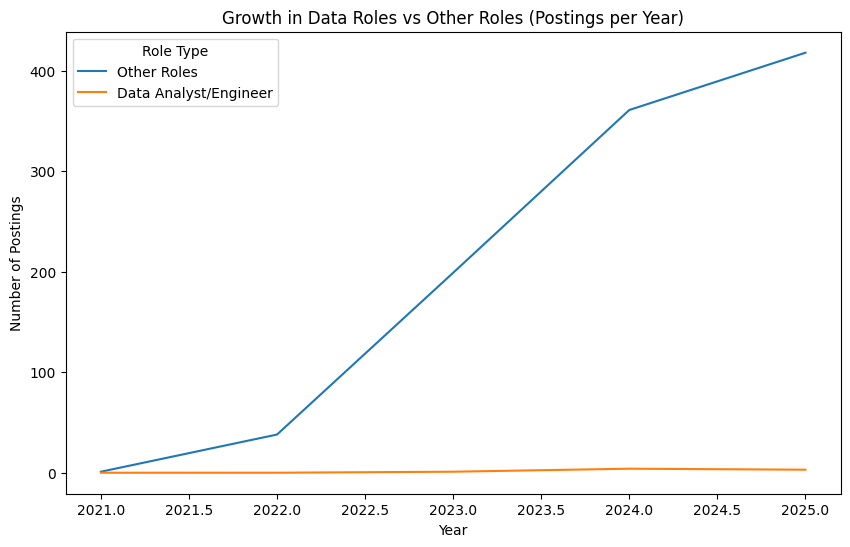

In [71]:
# Growth & Demand Hypothesis (Focused)
# Plot: Line plot of postings/year for Data jobs vs. others.

df_keywords['is_data_role'] = df_keywords['business_title'].str.contains(r'data analyst|data engineer', case=False, na=False)
df_keywords['posting_year'] = df_keywords['posting_date'].dt.year

growth = df_keywords.groupby(['posting_year','is_data_role']).size().unstack(fill_value=0)
growth.plot(figsize=(10,6))
plt.title('Growth in Data Roles vs Other Roles (Postings per Year)')
plt.ylabel('Number of Postings')
plt.xlabel('Year')
plt.legend(['Other Roles','Data Analyst/Engineer'], title='Role Type')
plt.show()

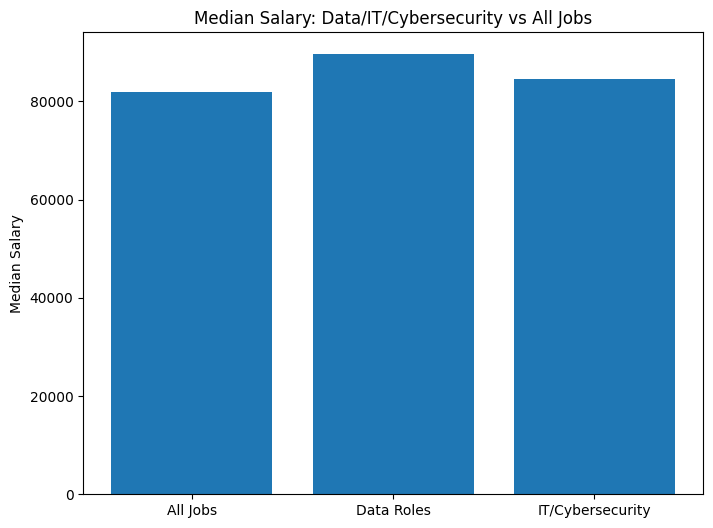

In [73]:
# Salary Premium Hypothesis (Focused)
# Plot: Compare median salary in data jobs, IT, cybersecurity, vs. all jobs.

data_roles = df_keywords['business_title'].str.contains(r'data analyst|data engineer', case=False, na=False)
it_roles = df_keywords['job_category'].str.contains(r'it|information technology|cyber|security|data|analyst|engineer|developer|software|bi|ml|ai|python|sql|cloud', case=False, na=False)

plt.figure(figsize=(8,6))
sns.boxplot(data=df_keywords, x=pd.cut(df_keywords['salary_avg'], bins=20), y=data_roles)
plt.close() # This plot may not be informative; let's do as below.

# Aggregate for comparison:
summary = {
    'All Jobs': df_keywords['salary_avg'].median(),
    'Data Roles': df_keywords.loc[data_roles, 'salary_avg'].median(),
    'IT/Cybersecurity': df_keywords.loc[it_roles, 'salary_avg'].median()
}
plt.figure(figsize=(8,6))
plt.bar(summary.keys(), summary.values())
plt.ylabel('Median Salary')
plt.title('Median Salary: Data/IT/Cybersecurity vs All Jobs')
plt.show()

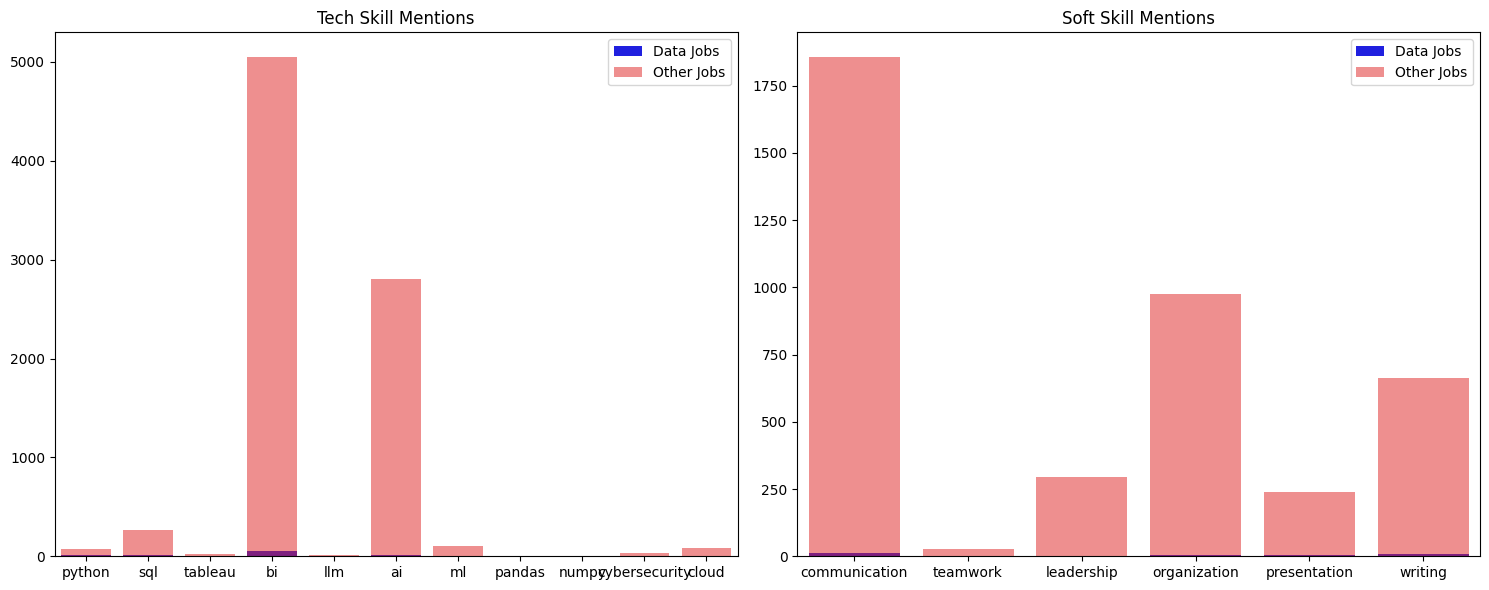

In [76]:
# Skills & Competency Hypothesis (Focused)
# Plot: Compare frequency of technical vs. soft skills in preferred_skills for data jobs vs. others.

# Predefine skill lists
tech_skills = ['python', 'sql', 'tableau', 'bi', 'llm', 'ai', 'ml', 'pandas', 'numpy', 'cybersecurity', 'cloud']
soft_skills = ['communication', 'teamwork', 'leadership', 'organization', 'presentation', 'writing']

def skill_count(df, skill_list):
    text = ' '.join(df['preferred_skills'].dropna().str.lower())
    return {skill: text.count(skill) for skill in skill_list}

# Data jobs vs others
data_jobs = df_keywords[df_keywords['business_title'].str.contains(r'data analyst|data engineer', case=False, na=False)]
other_jobs = df_keywords[~df_keywords['business_title'].str.contains(r'data analyst|data engineer', case=False, na=False)]

tech_counts_data = skill_count(data_jobs, tech_skills)
tech_counts_other = skill_count(other_jobs, tech_skills)
soft_counts_data = skill_count(data_jobs, soft_skills)
soft_counts_other = skill_count(other_jobs, soft_skills)

# Plot
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.barplot(x=list(tech_counts_data.keys()), y=list(tech_counts_data.values()), ax=axes[0], color='b', label='Data Jobs')
sns.barplot(x=list(tech_counts_other.keys()), y=list(tech_counts_other.values()), ax=axes[0], color='r', alpha=0.5, label='Other Jobs')
axes[0].set_title('Tech Skill Mentions')
axes[0].legend()

sns.barplot(x=list(soft_counts_data.keys()), y=list(soft_counts_data.values()), ax=axes[1], color='b', label='Data Jobs')
sns.barplot(x=list(soft_counts_other.keys()), y=list(soft_counts_other.values()), ax=axes[1], color='r', alpha=0.5, label='Other Jobs')
axes[1].set_title('Soft Skill Mentions')
axes[1].legend()
plt.tight_layout()
plt.show()

In [75]:
# Create a salary midpoint column and sector (job_category) normalization

df_keywords['salary_midpoint'] = df_keywords[['salary_range_from', 'salary_range_to']].mean(axis=1)
df_keywords['posting_year'] = df_keywords['posting_date'].dt.year
df_keywords['posting_month'] = df_keywords['posting_date'].dt.to_period('M')

# Create a boolean mask for IT/Cyber/Data jobs using regex on job_category or business_title
# Adjust the regex pattern as needed for the job market context
it_pattern = r'(it|information technology|cyber|security|data|analyst|engineer|developer|software|bi|ml|ai|python|sql|cloud)'
df_keywords['is_tech'] = df_keywords['job_category'].str.contains(it_pattern, na=False, case=False) | df_keywords['business_title'].str.contains(it_pattern, na=False, case=False)

# For skills analysis, create a list of keywords for technical and soft skills:
tech_skills = ['python', 'sql', 'tableau', 'bi', 'cyber', 'eda', 'security', 'machine learning', 'llm', 'ml', 'ai', 'pandas', 'numpy', 'cloud', 'agile', 'java', 'c++', 'linux']
soft_skills = ['communication', 'teamwork', 'leadership', 'collaboration', 'problem solving', 'organization', 'management', 'writing', 'presentation']

C:\Users\pablo\AppData\Local\Temp\ipykernel_13740\2439046529.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_keywords['is_tech'] = df_keywords['job_category'].str.contains(it_pattern, na=False, case=False) | df_keywords['business_title'].str.contains(it_pattern, na=False, case=False)


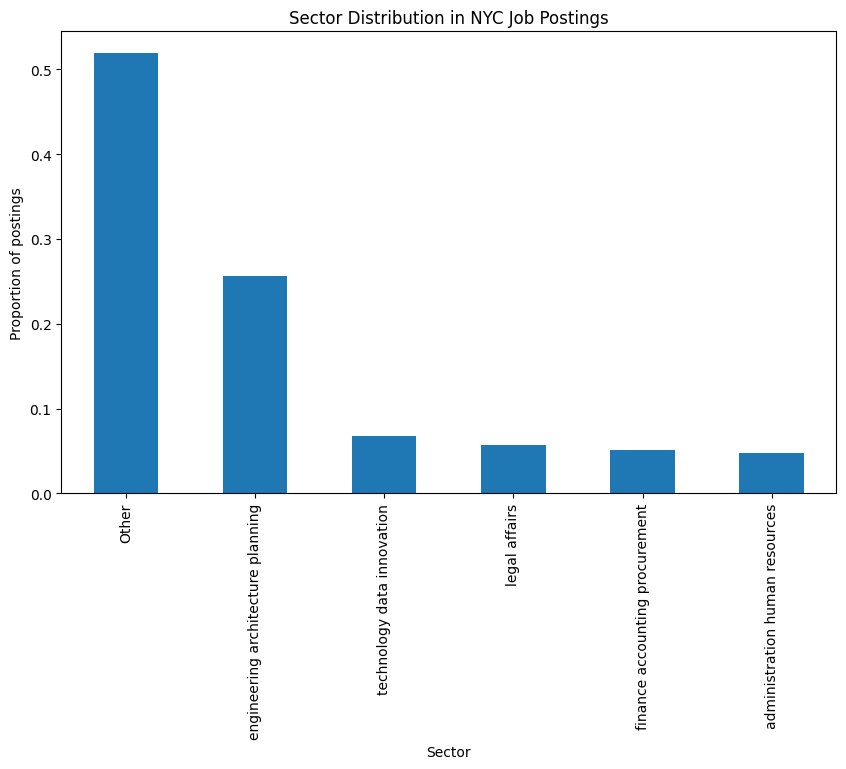

In [59]:
sector_counts = df_keywords['job_category'].value_counts()
top_sectors = sector_counts.head(5).index
top_sectors
df_keywords['sector_group'] = df_keywords['job_category'].where(df_keywords['job_category'].isin(top_sectors), 'Other')

# Plot distribution pie/bar
plt.figure(figsize=(10,6))
df_keywords['sector_group'].value_counts(normalize=True).plot(kind='bar')
plt.title('Sector Distribution in NYC Job Postings')
plt.ylabel('Proportion of postings')
plt.xlabel('Sector')
plt.show()


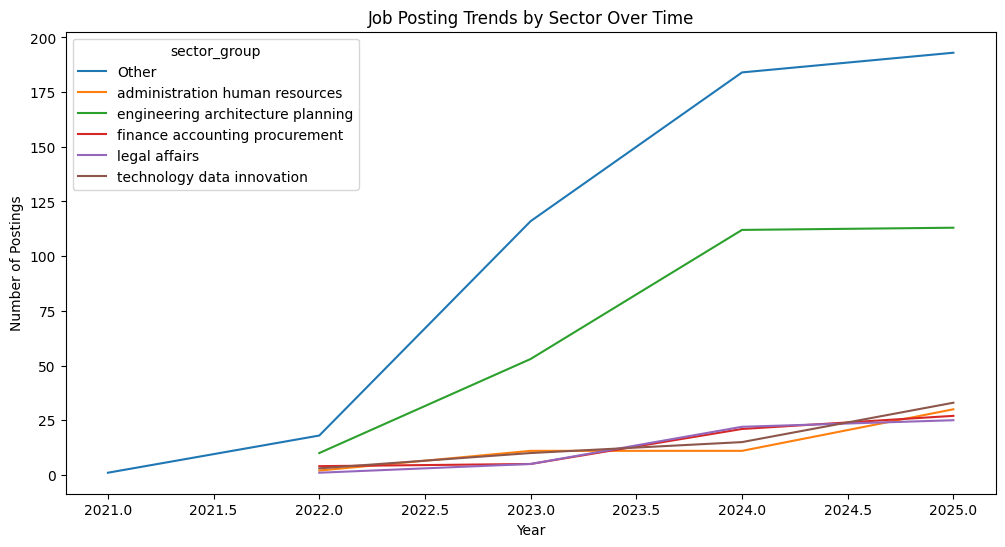

In [41]:
# Trend over time
sector_trend = df_keywords.groupby(['posting_year', 'sector_group']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=sector_trend, x='posting_year', y='count', hue='sector_group')
plt.title('Job Posting Trends by Sector Over Time')
plt.ylabel('Number of Postings')
plt.xlabel('Year')
plt.show()

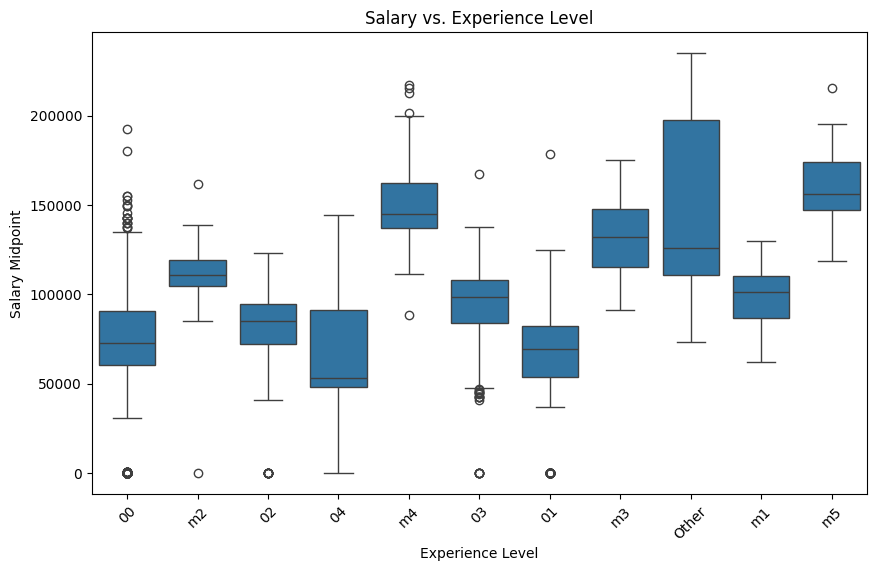

In [45]:
# Boxplot or regression of level vs. salary:

# Clean level for plotting (maybe group rare levels as 'Other')
level_counts = df_keywords['level'].value_counts()
common_levels = level_counts[level_counts > 20].index
df_keywords['level_group'] = df_keywords['level'].where(df_keywords['level'].isin(common_levels), 'Other')

plt.figure(figsize=(10,6))
sns.boxplot(data=df_keywords, x='level_group', y='salary_midpoint')
plt.title('Salary vs. Experience Level')
plt.ylabel('Salary Midpoint')
plt.xlabel('Experience Level')
plt.xticks(rotation=45)
plt.show()

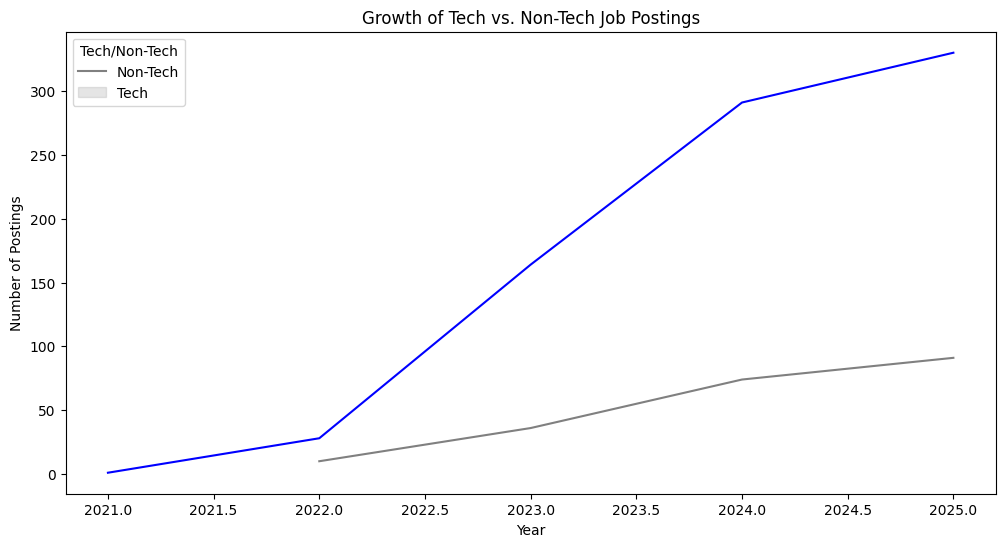

In [52]:
# Growth & Demand Hypothesis (Focused)
# Compare tech vs non-tech job trends over time

growth_df = df_keywords.groupby(['posting_year', 'is_tech']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=growth_df, x='posting_year', y='count', hue='is_tech', palette={True: 'blue', False: 'gray'})
plt.title('Growth of Tech vs. Non-Tech Job Postings')
plt.ylabel('Number of Postings')
plt.xlabel('Year')
plt.legend(title='Tech/Non-Tech', labels=['Non-Tech', 'Tech'])
plt.show()

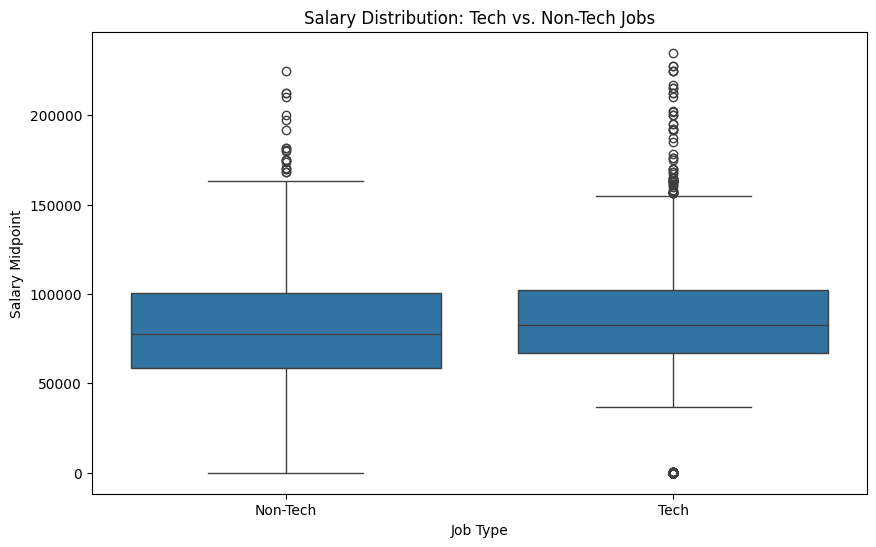

Median salary, tech: 82566.0
Median salary, non-tech: 77881.5
Median salary, all: 81981.5


In [54]:
# Salary Premium Hypothesis (Focused)
# Distribution of salaries for tech vs. non-tech

plt.figure(figsize=(10,6))
sns.boxplot(data=df_keywords, x='is_tech', y='salary_midpoint')
plt.title('Salary Distribution: Tech vs. Non-Tech Jobs')
plt.ylabel('Salary Midpoint')
plt.xlabel('Job Type')
plt.xticks([0,1], ['Non-Tech', 'Tech'])
plt.show()

# Median salary difference
print('Median salary, tech:', df_keywords[df_keywords['is_tech']]['salary_midpoint'].median())
print('Median salary, non-tech:', df_keywords[~df_keywords['is_tech']]['salary_midpoint'].median())
print('Median salary, all:', df_keywords['salary_midpoint'].median())

In [ ]:
# Conclusion
# With these plots, you’ll be able to visually and quantitatively compare:

# Salary characteristics
# Posting frequency and trends
# Contract types
# Agency and job category distribution
# Career level
# Posting durations and openness

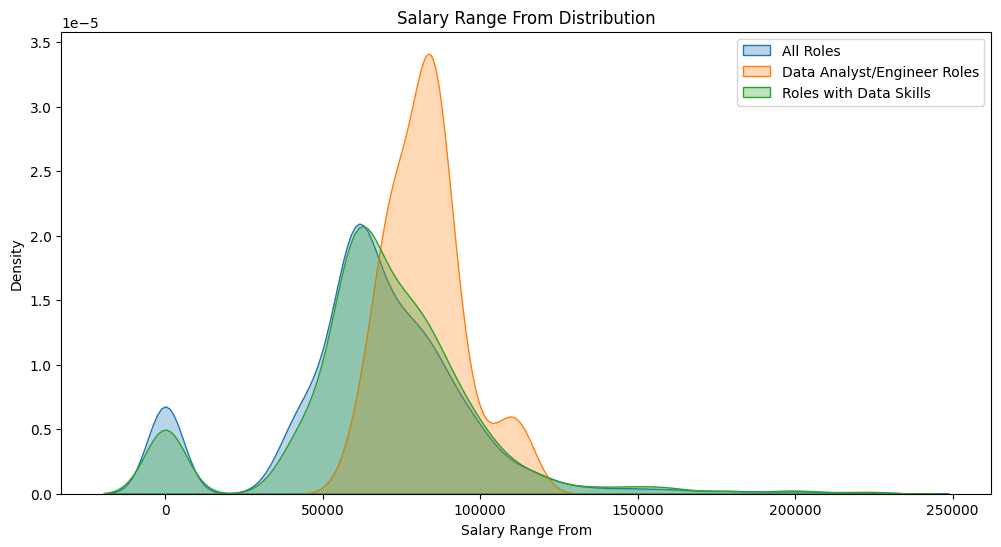

In [ ]:
# 1. Salary Distribution Comparison
# Insight:
# Data roles and jobs requiring modern data skills tend to have higher salary ranges than the general job population.

# What to look for:

# Are data roles and “preferred_skills” roles shifted higher than the general population?
# Are there outliers or salary bands unique to these groups?

plt.figure(figsize=(12,6))
sns.kdeplot(df_merged['salary_range_from'], label='All Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['salary_range_from'], label='Data Analyst/Engineer Roles', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['salary_range_from'], label='Roles with Data Skills', fill=True, alpha=0.3)
plt.title('Salary Range From Distribution')
plt.xlabel('Salary Range From')
plt.legend()
plt.show()

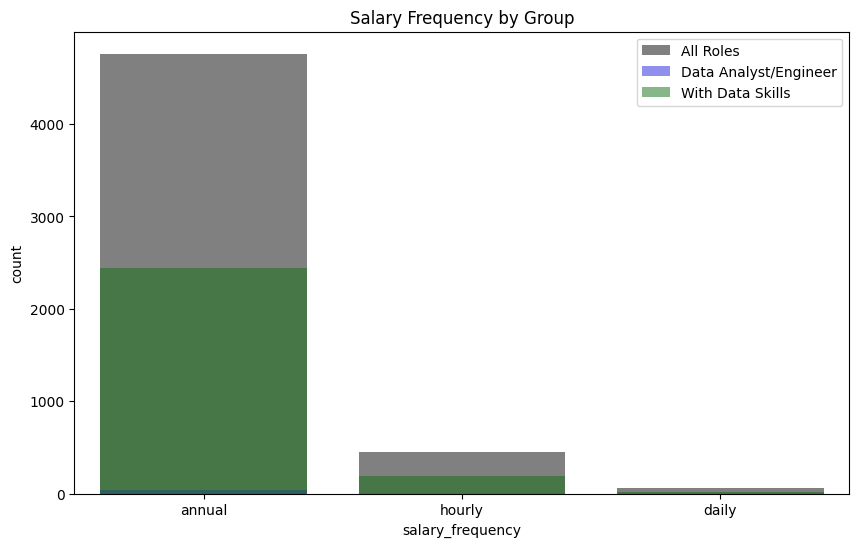

In [86]:
# 2. Salary Frequency by Group
# Insight:
# Jobs with data-centric titles or skills tend to be annual, not hourly.

# Are “Annual” contracts more frequent in data roles?
# Is “Hourly” rare?

plt.figure(figsize=(10,6))
ax = sns.countplot(x='salary_frequency', data=df_merged, color='gray', label='All Roles')
sns.countplot(x='salary_frequency', data=df_data_analyst, color='blue', alpha=0.5, label='Data Analyst/Engineer', ax=ax)
sns.countplot(x='salary_frequency', data=df_keywords, color='green', alpha=0.5, label='With Data Skills', ax=ax)
plt.title('Salary Frequency by Group')
# plt.xticks(rotation=30)
plt.legend()
plt.show()

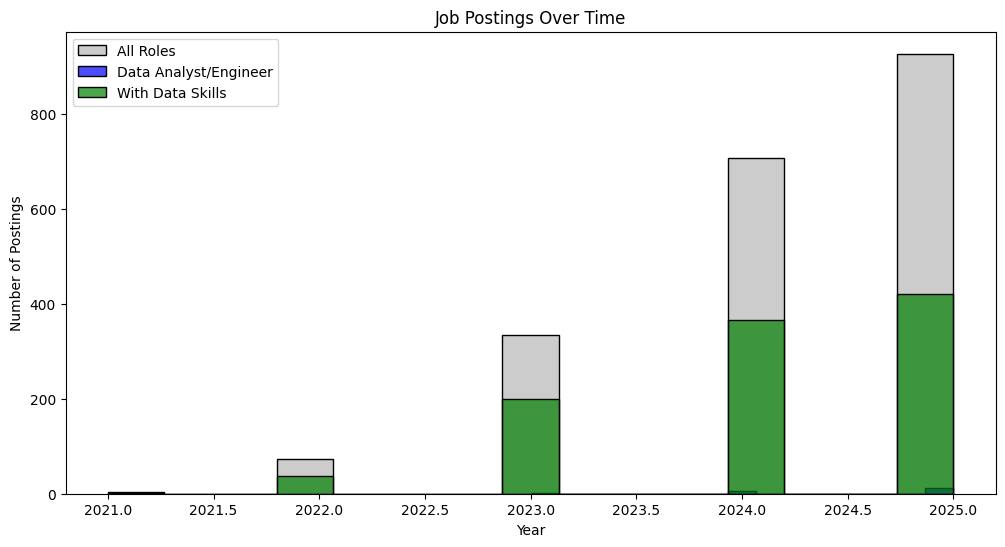

In [ ]:
# Job Posting Trends Over Time
# Insight:
# Are data-related jobs being posted more frequently in recent years?

# What to look for:

# Has there been an uptick in data-related roles?
# Are data jobs “younger” than the overall dataset?

plt.figure(figsize=(12,6))
sns.histplot(df_merged['posting_date'].dt.year.dropna(), label='All Roles', color='gray', alpha=0.4, bins=15)
sns.histplot(df_data_analyst['posting_date'].dt.year.dropna(), label='Data Analyst/Engineer', color='blue', alpha=0.7, bins=15)
sns.histplot(df_keywords['posting_date'].dt.year.dropna(), label='With Data Skills', color='green', alpha=0.7, bins=15)
plt.title('Job Postings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Postings')
plt.legend()
plt.show()

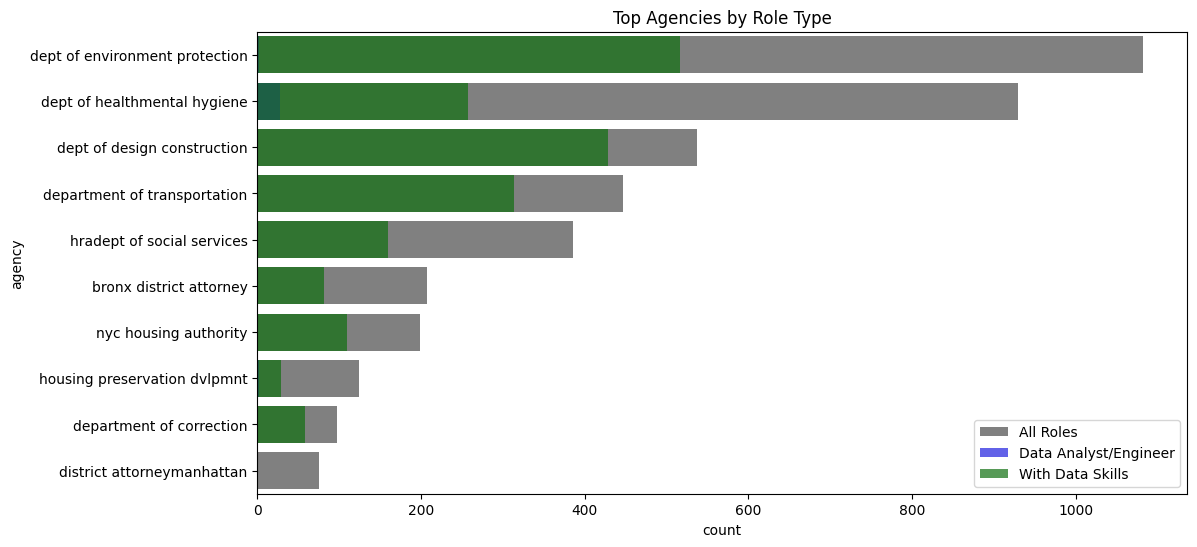

In [ ]:
# 4. Distribution of Agencies by Group
# Insight:
# Are certain agencies more likely to offer data-related roles?

# What to look for:

# Are some agencies highly represented in data jobs?
# Do “data skills” jobs cluster in a few agencies?

top_agencies = df_merged['agency'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(y='agency', data=df_merged[df_merged['agency'].isin(top_agencies)], 
              order=top_agencies, color='gray', label='All Roles')
sns.countplot(y='agency', data=df_data_analyst[df_data_analyst['agency'].isin(top_agencies)],
              order=top_agencies, color='blue', alpha=0.7, label='Data Analyst/Engineer')
sns.countplot(y='agency', data=df_keywords[df_keywords['agency'].isin(top_agencies)],
              order=top_agencies, color='green', alpha=0.7, label='With Data Skills')
plt.title('Top Agencies by Role Type')
plt.legend()
plt.show()

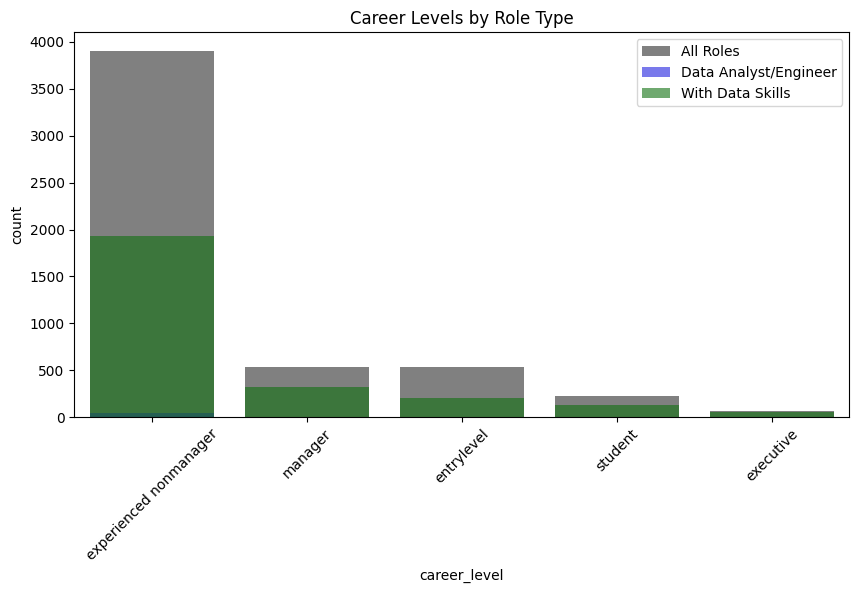

In [89]:
# 5. Career Level Comparison
# Insight:
# Data roles may require higher or more specialized career levels.

# What to look for:

# Are “Manager” or “Experienced” levels overrepresented in data jobs?

plt.figure(figsize=(10,5))
sns.countplot(x='career_level', data=df_merged, color='gray', label='All Roles', order=df_merged['career_level'].value_counts().index)
sns.countplot(x='career_level', data=df_data_analyst, color='blue', alpha=0.6, label='Data Analyst/Engineer')
sns.countplot(x='career_level', data=df_keywords, color='green', alpha=0.6, label='With Data Skills')
plt.title('Career Levels by Role Type')
plt.xticks(rotation=45)
plt.legend()
plt.show()

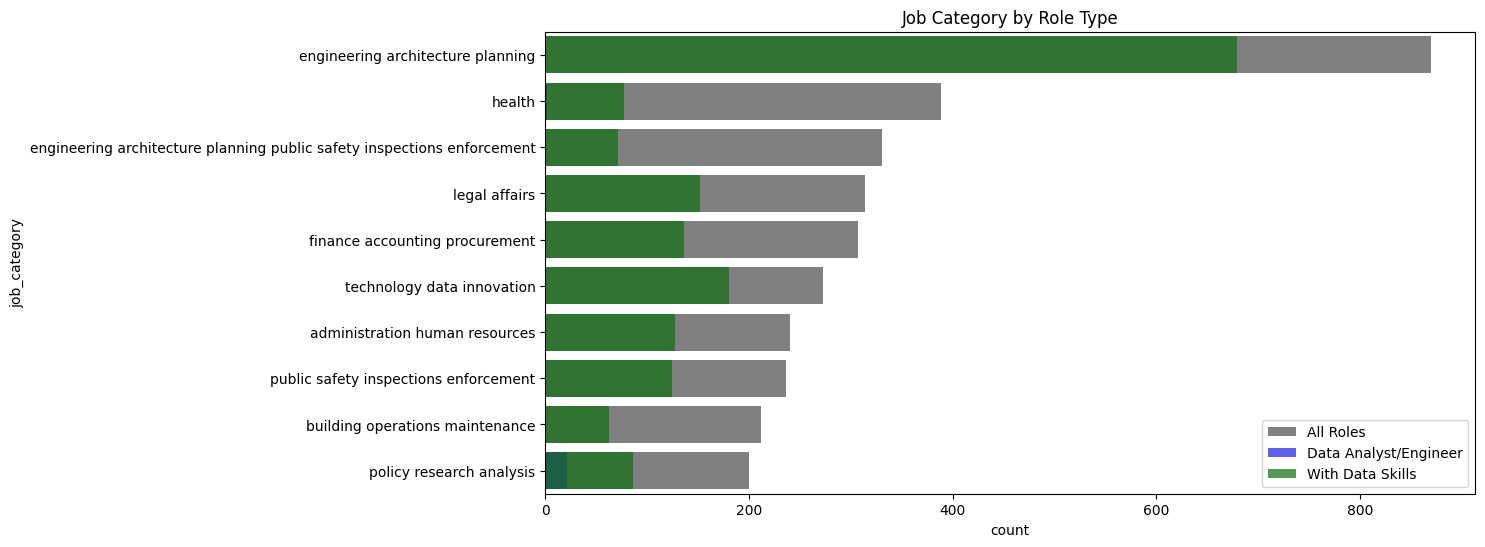

In [92]:
# 6. Job Category Comparison
# Insight:
# Are data jobs concentrated in certain job categories (e.g., IT, Planning, Research)?

# What to look for:

# Which job categories are most common for data-related jobs?

top_job_cats = df_merged['job_category'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(y='job_category', data=df_merged[df_merged['job_category'].isin(top_job_cats)], 
              order=top_job_cats, color='gray', label='All Roles')
sns.countplot(y='job_category', data=df_data_analyst[df_data_analyst['job_category'].isin(top_job_cats)],
              order=top_job_cats, color='blue', alpha=0.7, label='Data Analyst/Engineer')
sns.countplot(y='job_category', data=df_keywords[df_keywords['job_category'].isin(top_job_cats)],
              order=top_job_cats, color='green', alpha=0.7, label='With Data Skills')
plt.title('Job Category by Role Type')
plt.legend()
plt.show()

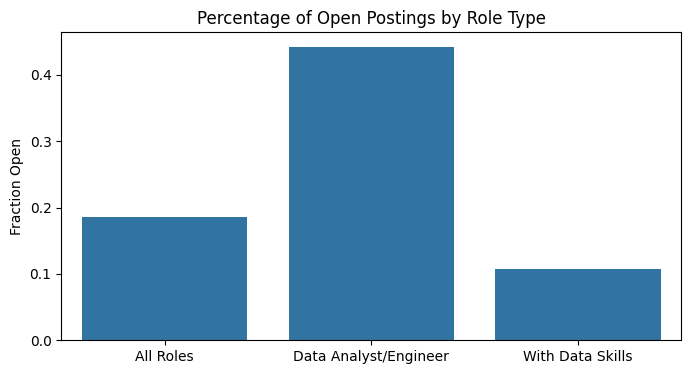

In [93]:
# 7. Open vs Expired Postings
# Insight:
# Are data jobs open for longer or more likely to still be open?

# What to look for:

# Are a greater percentage of data roles still open?

import datetime as dt

today = pd.Timestamp(dt.datetime.now())
for df in [df_merged, df_data_analyst, df_keywords]:
    df['is_open'] = df['post_until'] > today

plt.figure(figsize=(8,4))
sns.barplot(x=['All Roles','Data Analyst/Engineer','With Data Skills'],
            y=[df_merged['is_open'].mean(), df_data_analyst['is_open'].mean(), df_keywords['is_open'].mean()])
plt.title('Percentage of Open Postings by Role Type')
plt.ylabel('Fraction Open')
plt.show()

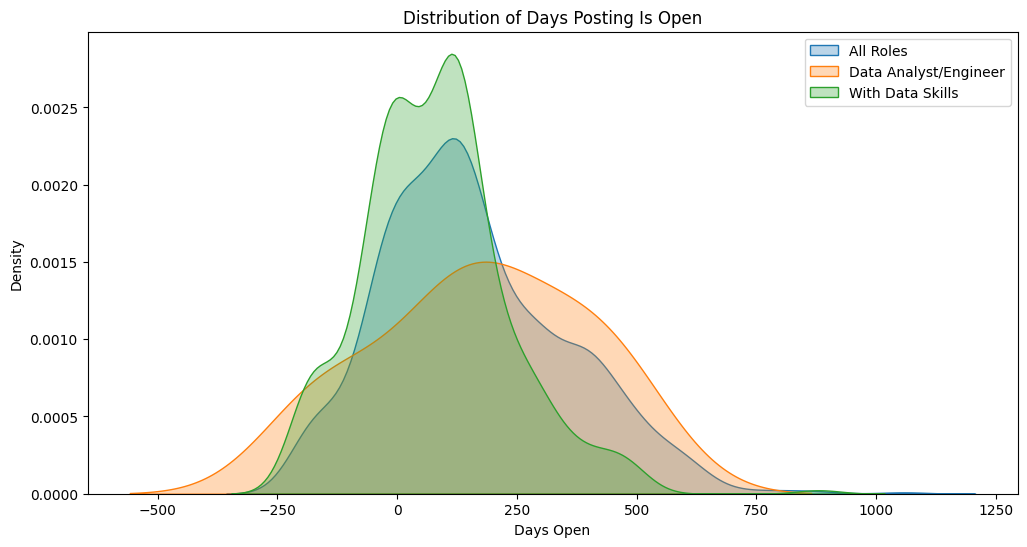

In [94]:
# 8. Days Posting is Open
# Insight:
# Do data roles stay posted longer or shorter than the general population?

# What to look for:

# Are data roles posted for longer or shorter periods?

for df in [df_merged, df_data_analyst, df_keywords]:
    df['days_open'] = (df['post_until'] - df['posting_date']).dt.days

plt.figure(figsize=(12,6))
sns.kdeplot(df_merged['days_open'].dropna(), label='All Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['days_open'].dropna(), label='Data Analyst/Engineer', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['days_open'].dropna(), label='With Data Skills', fill=True, alpha=0.3)
plt.title('Distribution of Days Posting Is Open')
plt.xlabel('Days Open')
plt.legend()
plt.show()

In [97]:
# --- Hypothesis 2: Salary Structure ---
# Clean the 'level' column to make it uniform for ordering
def clean_level(level):
    if isinstance(level, str):
        level = level.strip()
        if level.isdigit():
            return f"{int(level):02d}"  # Pad with zero for correct sorting
        if level.lower().startswith('m'):
            return level.lower()
    return 'Other'  # Group non-standard levels

df_merged['cleaned_level'] = df_merged['level'].apply(clean_level)
df_salary_level = df_merged[df_merged['cleaned_level'] != 'Other'].copy()
# Sort the levels for a more intuitive plot
sorted_levels = sorted(df_salary_level['cleaned_level'].unique())
# median_salary_by_level = df_salary_level.groupby('cleaned_level')['salary_midpoint'].median().reindex(sorted_levels)
median_salary_by_level = df_salary_level.groupby('cleaned_level')['avg_salary'].median().reindex(sorted_levels)
# Plot median salary by job level
plt.figure(figsize=(12, 8))
median_salary_by_level.plot(kind='bar', color=sns.color_palette('mako', len(median_salary_by_level)))
plt.title('Median Salary by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Median Average Salary ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'Column not found: avg_salary'

In [ ]:
df_merge2 = df_merged.copy().reset_index(drop=True)

df_merge2['avg_salary'] = np.where(
    df_merge2['salary_range_from'] == 0,
    df_merge2['salary_range_to'],
    np.where(
        df_merge2['salary_range_to'] == 0,
        df_merge2['salary_range_from'],
        (df_merge2['salary_range_from'] + df_merge2['salary_range_to']) / 2
    )
)

df_merge2['salary_frequency'] = df_merge2['salary_frequency'].str.strip().str.lower()
def to_annual(row):
    if "hour" in row['salary_frequency']:
        return row['avg_salary'] * 2080
    elif "day" in row['salary_frequency']:
        return row['avg_salary'] * 260
    elif "year" in row['salary_frequency'] or "annual" in row['salary_frequency']:
        return row['avg_salary']
    else:
        return np.nan
df_merge2['annual_salary'] = df_merge2.apply(to_annual, axis=1)













KeyError: 'avg_salary'